# Tarjeta de datos 1

### Hipótesis 1: "Las provincias con una edad media menor y una renta media por hogar mayor a la nacional, suelen estar más concienciadas con el uso de energías renovables y utilizan más dispositivos que aprovechan este tipo de energía."

La justificación de esta hipótesis es que las personas jóvenes suelen estar más concienciadas con el medio ambiente, además de que tienen más tiempo para amortizar la inversión de este tipo de tecnología a lo largo de su vida.
<br>
<br>

### Preparación del entorno

In [1018]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from ydata_profiling import ProfileReport
import os 

SILVER_DATA_PATH = os.path.join("..", "data/silver/")

### Datos

Primero, cargamos los datasets que utilizaremos en esta tarjeta, los cuales han sido generados a partir del procesamiento inicial de los datos y corresponden a la capa silver.

In [996]:
# Distribución de edad
distribucion_edad_df=pd.read_csv(SILVER_DATA_PATH+"distribucion_edad.csv", sep = ";", encoding = "latin", dtype = str)
distribucion_edad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Provincias                  987 non-null    object
 1   Edad (grupos quinquenales)  987 non-null    object
 2   Total                       987 non-null    object
dtypes: object(3)
memory usage: 23.3+ KB


In [997]:
# Renta media
renta_media_hogar_df = pd.read_csv(SILVER_DATA_PATH+"renta_media_hogar.csv", sep = ";", encoding = "latin", dtype= str)
renta_media_hogar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincias  141 non-null    object
 1   Periodo     141 non-null    object
 2   Total       141 non-null    object
dtypes: object(3)
memory usage: 3.4+ KB


In [998]:
# Dispositivos de energía renovable
dispositivos_renovable_df=pd.read_csv(SILVER_DATA_PATH+"dispositivos_renovable.csv", sep = ";", encoding = "latin")
dispositivos_renovable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Provincias                                   470 non-null    object
 1   Ingresos netos                               470 non-null    object
 2   Dispone de dispositivo de energía renovable  470 non-null    object
 3   Total                                        470 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 14.8+ KB


### Procesamiento

#### distribucion_edad_df

Del dataset distribucion_edad_df.csv queremos obtener la información sobre los intervalos de edad de cada año por provincia, además de:

- El total nacional del número de habitantes.
- La edad media a nivel nacional.
- El número de habitantes por provincia.

In [999]:
# Ejemplo de los datos que presenta la tabla
distribucion_edad_df.head(5)

,Provincias,Edad (grupos quinquenales),Total
0,Almería,De 0 a 4 años,36.360
1,Almería,De 5 a 9 años,41.033
2,Almería,De 10 a 14 años,43.411
3,Almería,De 15 a 19 años,40.722
4,Almería,De 20 a 24 años,41.532


La columna "Total" contiene valores que deben ser interpretados como números enteros. Sin embargo, en la fila 1 del dataset, el valor registrado en la columna "Total" es "36.360". Este formato incluye un punto como separador de miles, pero el valor esperado es el entero 36360. Para corregir este error, se procederá a eliminar el punto y convertir el valor de tipo cadena a un entero.

In [1000]:
# Reemplazar todos los puntos en la columna "Total" con una cadena vacía y pasarlo a entero
distribucion_edad_df["Total"] = distribucion_edad_df["Total"].str.replace(".", "", regex=False).astype(int)
distribucion_edad_df.head(5)

,Provincias,Edad (grupos quinquenales),Total
0,Almería,De 0 a 4 años,36360
1,Almería,De 5 a 9 años,41033
2,Almería,De 10 a 14 años,43411
3,Almería,De 15 a 19 años,40722
4,Almería,De 20 a 24 años,41532


Total nacional del número de habitantes.

In [1001]:
# Calcular la suma de la columna 'Total'
poblacion_total_nacional = distribucion_edad_df['Total'].sum()
print(f"Hay un total de {poblacion_total_nacional} habitantes en España.")

Hay un total de 43952773 habitantes en España.


Edad media a nivel nacional

In [1002]:
# Función para obtener la edad media de cada grupo quinquenal
def obtener_edad_media(grupo):
    # Comprobar si el grupo es "100 y más años"
    if "100 y más años" in grupo:
        return 100  # Asignamos 100 años como la edad media para este grupo
    else:
        # Extraer los valores del rango (e.g., "De 0 a 4 años" -> 0, 4)
        partes = grupo.split(' a ')
        edad_inferior = int(partes[0].split(' ')[1])
        edad_superior = int(partes[1].split(' ')[0])
        # Calcular la edad media del grupo
        return (edad_inferior + edad_superior) / 2
    
edad_media_nivel_nacional = 0

# Se calcula la edad media nacional
for index, row in distribucion_edad_df.iterrows():
    rango_edad = row['Edad (grupos quinquenales)']
    media_rango = obtener_edad_media(rango_edad)
    edad_media_nivel_nacional = edad_media_nivel_nacional + (row['Total'] * media_rango)

edad_media_nivel_nacional = edad_media_nivel_nacional/poblacion_total_nacional
print(f"La edad media en España es de {edad_media_nivel_nacional} años.")

La edad media en España es de 43.69820011128763 años.


Número de habitantes por provincia

In [1003]:
# Agrupar por 'Provincias' y calcular el sumatorio de la columna 'Total'
poblacion_total_provincias = distribucion_edad_df.groupby('Provincias')['Total'].sum().reset_index()
poblacion_total_provincias.head(5)


,Provincias,Total
0,Albacete,385727
1,Alicante/Alacant,1901594
2,Almería,740534
3,Araba/Álava,334412
4,Asturias,1004686


<br>
<br>

#### renta_media_hogar_df 

El objetivo con el dataset renta_media_hogar_df es calcular la renta media nacional a partir de la media ponderada usando el número de habitantes.

In [1004]:
# Ejemplo de los datos que presenta la tabla
renta_media_hogar_df.head(5)

,Provincias,Periodo,Total
0,Almería,2022,28.442
1,Almería,2021,27.184
2,Almería,2020,26.276
3,Cádiz,2022,30.055
4,Cádiz,2021,28.501


In [1005]:
# Nos quedamos con los datos del 2022
renta_media_hogar_df = renta_media_hogar_df[renta_media_hogar_df['Periodo'] == "2022"]
renta_media_hogar_df = renta_media_hogar_df.reset_index(drop=True)

# Eliminamos la columna 'Periodo'
renta_media_hogar_df = renta_media_hogar_df.drop('Periodo', axis=1)

renta_media_hogar_df.head(5)

,Provincias,Total
0,Almería,28.442
1,Cádiz,30.055
2,Córdoba,29.082
3,Granada,29.113
4,Huelva,29.133


Vemos que pasa lo mismo que en el caso anterior con la columna "Total". Se realiza el mismo procedimiento para darle formato.

In [1006]:
# Reemplazar todos los puntos en la columna "Total" con una cadena vacía y pasarlo a entero
renta_media_hogar_df["Total"] = renta_media_hogar_df["Total"].str.replace(".", "", regex=False).astype(int)
renta_media_hogar_df.head(5)

,Provincias,Total
0,Almería,28442
1,Cádiz,30055
2,Córdoba,29082
3,Granada,29113
4,Huelva,29133


Calculamos la renta media nacional

In [1007]:
renta_media_nacional = renta_media_hogar_df['Total'].mean()

print(f"La renta media nacional ponderada es de {renta_media_nacional}")


La renta media nacional ponderada es de 29039.127659574468


<br>
<br>


#### dispositivos_renovable_df

In [1008]:
# Ejemplo de los datos que presenta la tabla
dispositivos_renovable_df.head(5)

,Provincias,Ingresos netos,Dispone de dispositivo de energía renovable,Total
0,Albacete,3.000 euros o más,No,13390
1,Albacete,3.000 euros o más,Si,1344
2,Albacete,De 1.000 euros a menos de 1.500 euros,No,38883
3,Albacete,De 1.000 euros a menos de 1.500 euros,Si,2260
4,Albacete,De 1.500 euros a menos de 2.000 euros,No,22329


Queremos generar un dataset que indique el porcentaje de la provincia que utiliza dispositivos de energía renovable

In [1009]:
# Agrupar por 'Provincias' y 'Dispone de dispositivo de energía renovable', sumando el total
dispositivos_renovable_df = dispositivos_renovable_df.groupby(['Provincias', 'Dispone de dispositivo de energía renovable'])['Total'].sum().unstack(fill_value=0)
dispositivos_renovable_df.head(5)

Dispone de dispositivo de energía renovable,No,Si
Provincias,,
Albacete,146255,6594
Alicante/Alacant,735245,30923
Almería,248102,17856
Araba/Álava,126383,14741
Asturias,431584,22865


In [1010]:
# Se calcula la proporción de hogares con dispositivos de energía renovable y se eliminan las columnas "Si" y "No"
dispositivos_renovable_df['Proporcion hogares con dispositivos de energía renovable'] = dispositivos_renovable_df['Si'] / (dispositivos_renovable_df['Si'] + dispositivos_renovable_df['No'])
dispositivos_renovable_df.drop(columns=['No', 'Si'], inplace=True)
dispositivos_renovable_df.head(5)

Dispone de dispositivo de energía renovable,Proporcion hogares con dispositivos de energía renovable
Provincias,
Albacete,0.043141
Alicante/Alacant,0.040361
Almería,0.067138
Araba/Álava,0.104454
Asturias,0.050314


In [1011]:
# Las columnas están estructuradas como un MultiIndex, el objetivo es "aplanarlas" y dejar el dataset como | Provincias | Proporción ... |
dispositivos_renovable_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in dispositivos_renovable_df.columns]
dispositivos_renovable_df.reset_index(inplace=True)

dispositivos_renovable_df.head(5)

,Provincias,Proporcion hogares con dispositivos de energía renovable
0,Albacete,0.043141
1,Alicante/Alacant,0.040361
2,Almería,0.067138
3,Araba/Álava,0.104454
4,Asturias,0.050314


<br>


### Resultado

In [1012]:
# Unir ambos DataFrames: poblacion_total_provincias, dispositivos_renovable_df
data_card_1_df = pd.merge(poblacion_total_provincias, dispositivos_renovable_df, on='Provincias')
# Renombrar las columnas del DataFrame resultante
data_card_1_df.rename(columns={'Total': 'Poblacion_Total'}, inplace=True)

data_card_1_df.head(5)

,Provincias,Poblacion_Total,Proporcion hogares con dispositivos de energía renovable
0,Albacete,385727,0.043141
1,Alicante/Alacant,1901594,0.040361
2,Almería,740534,0.067138
3,Araba/Álava,334412,0.104454
4,Asturias,1004686,0.050314


Datos importantes

In [1013]:
print(f"Hay un total de {poblacion_total_nacional} habitantes en España.")
print(f"La edad media en España es de {edad_media_nivel_nacional} años.")

print(f"La renta media nacional ponderada es de {renta_media_nacional}.")

Hay un total de 43952773 habitantes en España.
La edad media en España es de 43.69820011128763 años.
La renta media nacional ponderada es de 29039.127659574468.


<br>

### Data Profiling

Estudio sobre población total de España.

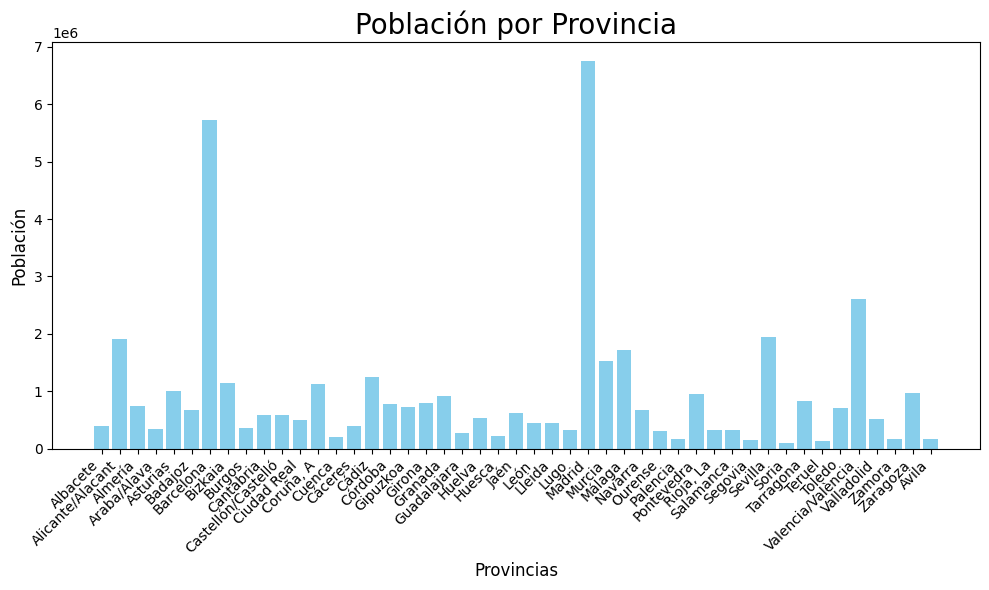

In [1014]:
df = pd.DataFrame(data_card_1_df)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(df["Provincias"], df["Poblacion_Total"], color='skyblue')

# Agregar títulos y etiquetas
plt.title("Población por Provincia", fontsize=20)
plt.xlabel("Provincias", fontsize=12)
plt.ylabel("Población", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Estudio sobre la proporción de hogares con dispositivos de energía renovable.

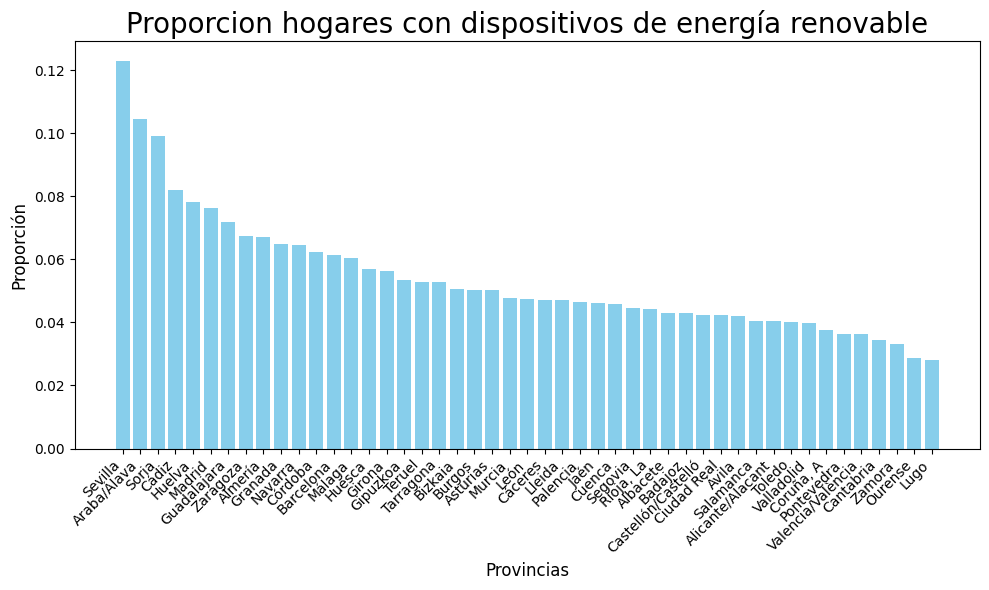

In [1015]:
df = pd.DataFrame(data_card_1_df)
df = df.sort_values(by="Proporcion hogares con dispositivos de energía renovable", ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(df["Provincias"], df["Proporcion hogares con dispositivos de energía renovable"], color='skyblue')

# Agregar títulos y etiquetas
plt.title("Proporcion hogares con dispositivos de energía renovable", fontsize=20)
plt.xlabel("Provincias", fontsize=12)
plt.ylabel("Proporción", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Generamos un profile report del estudio.

In [1019]:
profile = ProfileReport(data_card_1_df, title="Reporte de Perfil de Datos", explorative=True)
profile.to_file("reporte_eda.html")

Summarize dataset:  50%|█████     | 5/10 [00:00<00:00, 108.16it/s, Calculate auto correlation]                                      c:\Users\Francisco Javier\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 2 0 0 1 0 8 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 9 2 2 0 0 0 1 0 0 0
 2 0 1 0 0 3 0 0 1 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 330.26it/s]
